<a href="https://colab.research.google.com/github/CreativeFun/Neural-Network-Training/blob/main/WaterPotability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Water potability - analiza danych 

Source of data:https://www.kaggle.com/datasets/adityakadiwal/water-potability?resource=download

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import missingno as msno
import seaborn as sns #seaborn użyty do rysowania wykresów
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import MinMaxScaler
import numpy as np

Wczytanie danych

In [87]:
df = pd.read_csv("water_potability.csv")
df = df.rename(columns={'ph':'pH'})


Wstępna analiza zbiorów danych - zapoznanie z budową pliku 

In [88]:
df.head() #Przedstawienie danych z pliku

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [89]:
df.tail(7) #Ostatnie 7 rekordów przekazuje informację o wielkości pliku z danymi

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


Dostosowanie zbioru danych do potrzeb dalszej analizy

In [90]:
df.isnull().sum() #sprawdzenie czy w danych wystepują puste pola i jaka jest ich liczba dla poszczególnych kolumn

pH                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [91]:
df = df.dropna() #odrzucenie wierszy, w których występują luki

Zestawienie kluczowych elementów do dalszej analizy w przypadku machine learning/deep learning

In [92]:
df.describe() #przedstawienie wartości matematyczych [średnia,min, max, suma.....]

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


Wykres przedstawiający ilość rekordów zawierających wodę
*   0 - nie pitną
*   1 - pitną


Text(0.9, 405.5, '811')

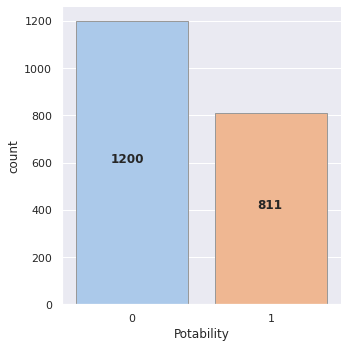

In [147]:
import matplotlib
g = sns.catplot(x="Potability", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

potable = (df["Potability"] == 1).sum()
not_potable = (df["Potability"] == 0).sum()

g.ax.text(-0.15,not_potable/2, not_potable,weight="bold")
g.ax.text(0.9,potable/2, potable, weight="bold")


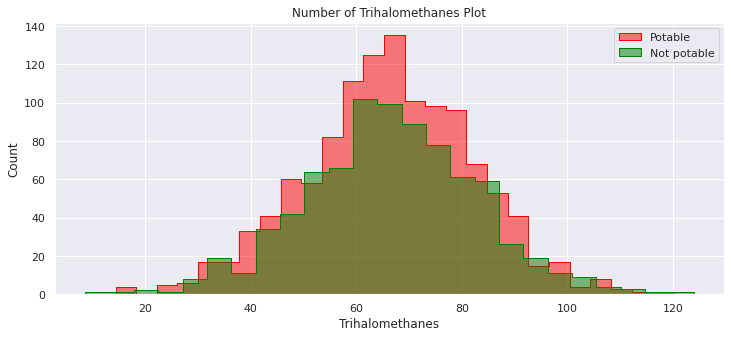

In [165]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df[df["Potability"] == 0]['Trihalomethanes'],  kde=False, label="Potable", element="step", alpha  = 0.5, color = 'red').set(title='Number of Trihalomethanes Plot')
sns.histplot(df[df["Potability"] == 1]['Trihalomethanes'],  kde=False, label="Not potable", element="step", alpha  = 0.5, color = 'green')
plt.legend()

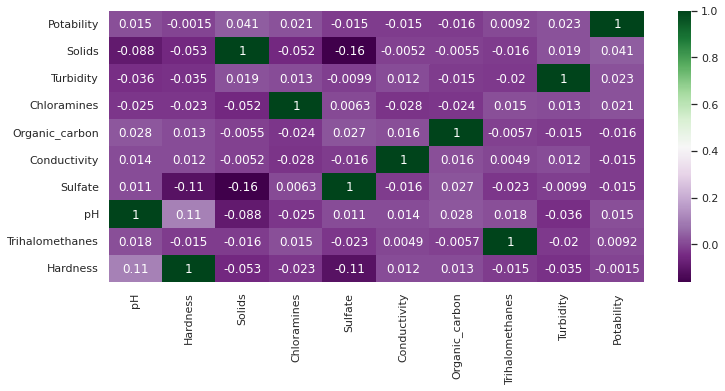

In [150]:
list1 = ['pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

corr = df.corr().sort_values(ascending=False, key=lambda x: abs(x), by="Potability" )
sns.heatmap(corr, cmap="PRGn", annot=True)

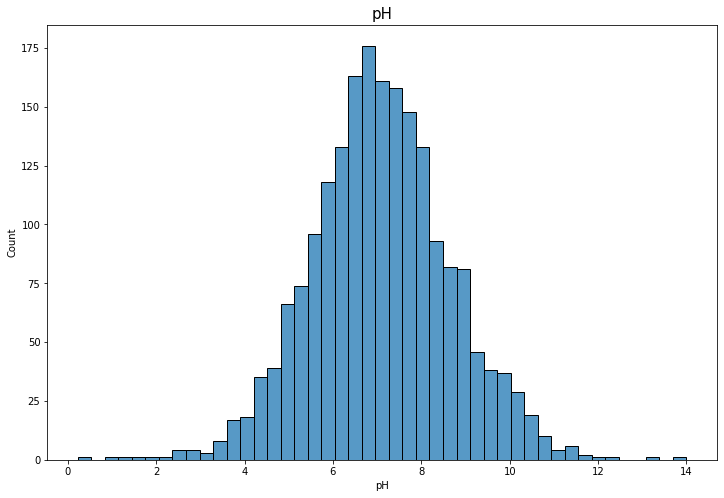

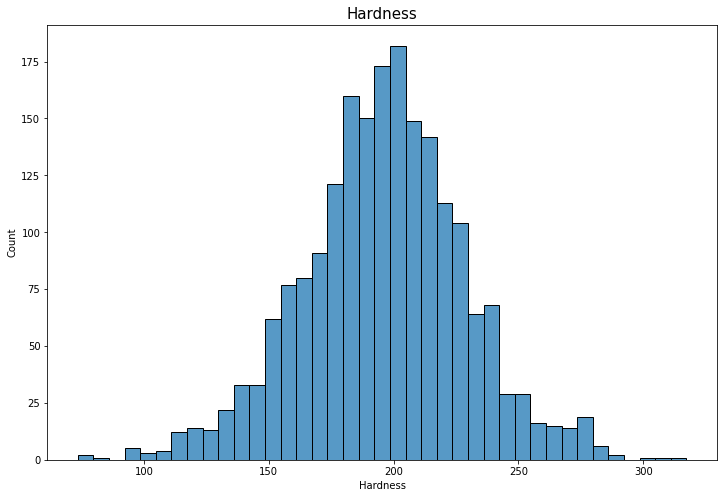

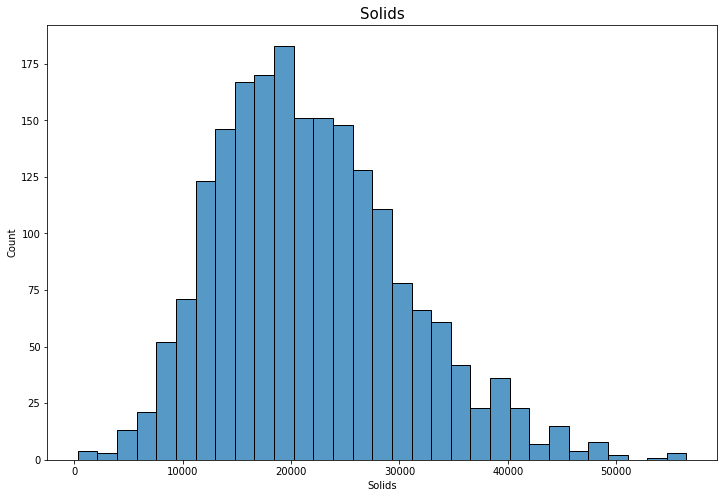

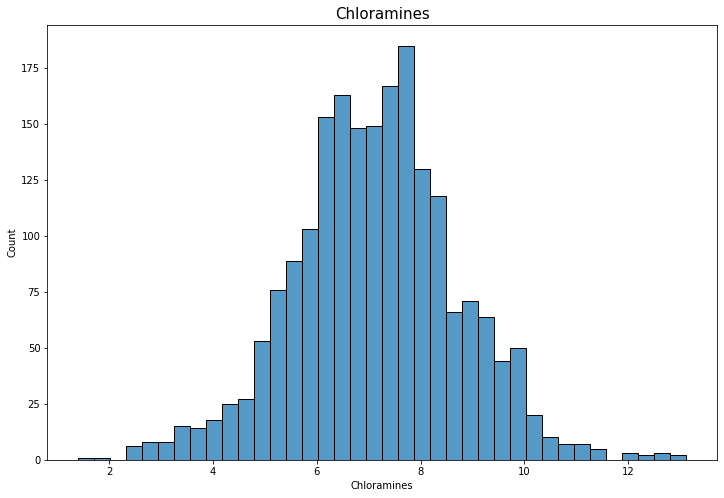

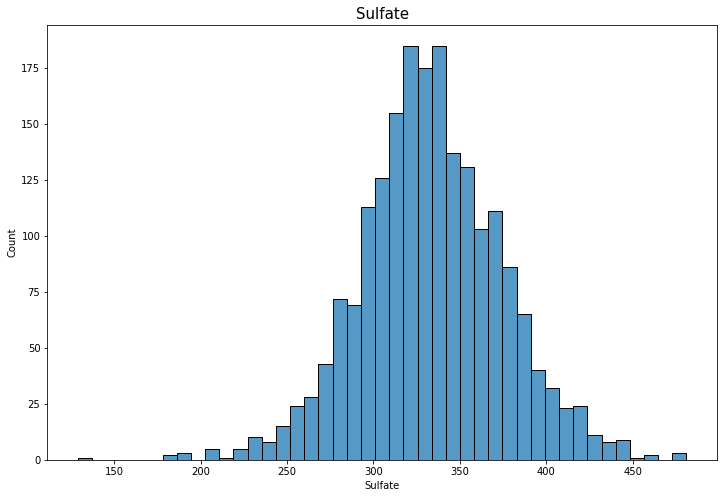

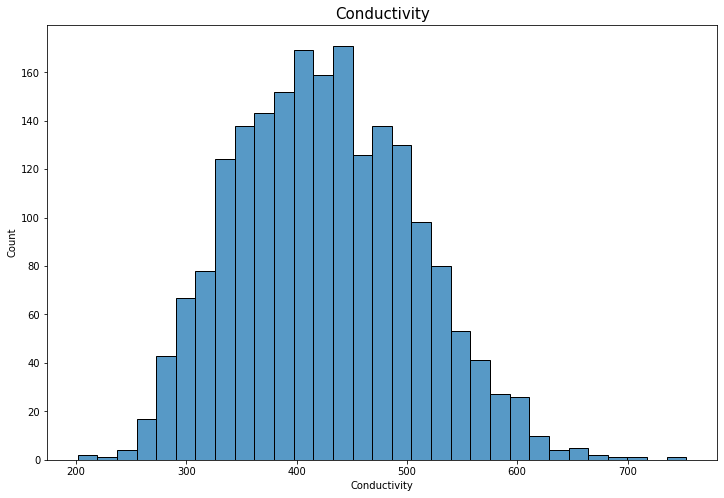

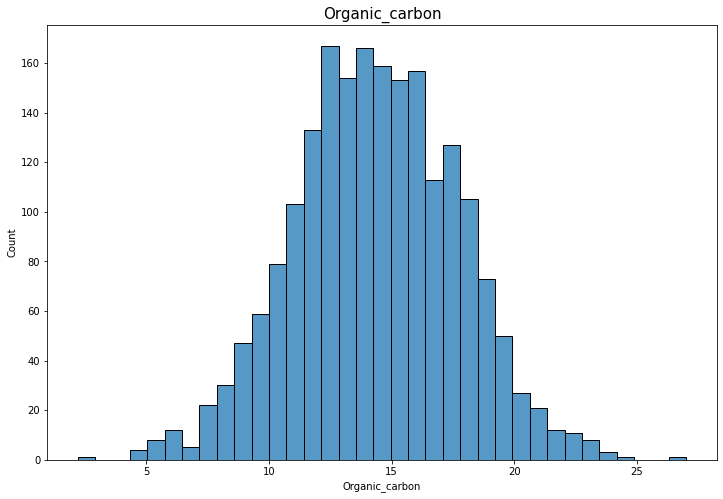

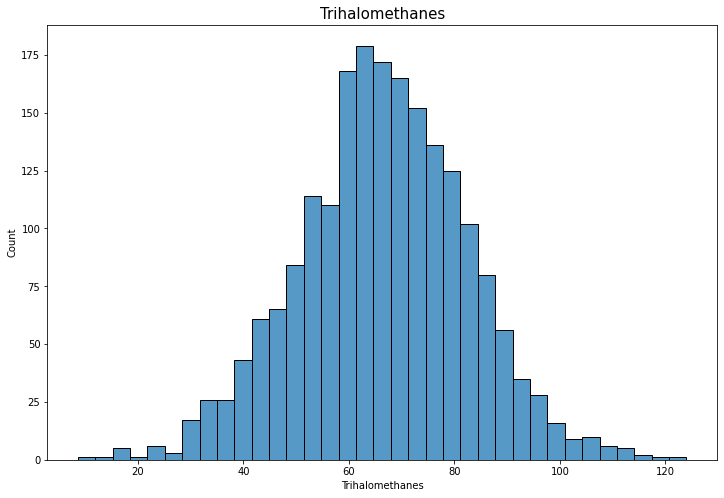

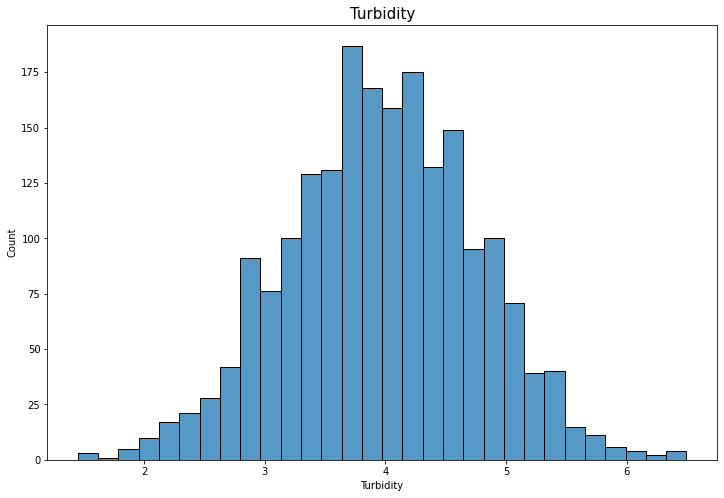

In [ ]:
for col in df.drop("Potability", axis=1).columns:
    plt.figure(figsize=(12,8))
    sns.histplot(df[col])
    plt.title(f"{col}", size=15)
    plt.show()

In [ ]:
scaler = MinMaxScaler()
type(scaler)
df[['pH','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']] = scaler.fit_transform(df[['pH','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']])
print(scaler.fit_transform)
df.head()
df.describe()

<bound method TransformerMixin.fit_transform of MinMaxScaler()>


,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,0.497984,0.502267,0.384500,0.489383,0.580133,0.407644,0.490098,0.500973,0.499476,0.403282
std,0.114238,0.133835,0.153865,0.135038,0.117050,0.146292,0.134035,0.139289,0.154685,0.490678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.425647,0.423434,0.272304,0.404565,0.507435,0.299173,0.400057,0.410452,0.395048,0.000000
50%,0.493723,0.507286,0.366982,0.490199,0.577314,0.402079,0.488659,0.502198,0.499168,0.000000
75%,0.568195,0.586226,0.478240,0.572493,0.654291,0.508867,0.583836,0.595331,0.607399,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x = df.iloc[:,:-1].values
print(x)
y = df.iloc[:,-1].values
print(y)

[[0.58734916 0.57774671 0.38629788 ... 0.65452157 0.79502934 0.63011476]
 [0.64365393 0.44130035 0.31438058 ... 0.37724796 0.20291434 0.52035803]
 [0.38893354 0.47087564 0.50612238 ... 0.24992171 0.40148717 0.21997295]
 ...
 [0.81782618 0.08743355 0.65638906 ... 0.56326524 0.28574454 0.5786739 ]
 [0.42418706 0.4640915  0.45965606 ... 0.39778031 0.44915584 0.44000443]
 [0.32242529 0.49289123 0.84140928 ... 0.47142165 0.50345848 0.59186714]]
[0 0 0 ... 1 1 1]


In [ ]:
print(x.shape)
print(y.shape)

(2011, 9)
(2011,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, 
                                                    )
print(X_train.shape)
print(X_test.shape)
print(X_train[0])

(1347, 9)
(664, 9)
[0.57212505 0.57223453 0.43104692 0.41294293 0.54852343 0.57251624
 0.48986879 0.44430727 0.26149253]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200,criterion='entropy') #instancja
rfc.fit(X_train,y_train) #trening modelu


RandomForestClassifier(criterion='entropy', n_estimators=200)

In [ ]:
ypred = rfc.predict(X_test)
print(ypred)

[0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1
 0 0 0 1 0 0 0 0 0 1 0 0 

In [ ]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, ypred)

print(confusion)

[[351  61]
 [146 106]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred, target_names=['yes','no']))

              precision    recall  f1-score   support

         yes       0.71      0.85      0.77       412
          no       0.63      0.42      0.51       252

    accuracy                           0.69       664
   macro avg       0.67      0.64      0.64       664
weighted avg       0.68      0.69      0.67       664



# Duzymi literami uczenie głębokie


In [ ]:
import tensorflow
from tensorflow import keras 

model = keras.Sequential(
    [
      keras.layers.Dense(9,activation="ReLU"),
      keras.layers.Dense(64,activation="ReLU"),
      keras.layers.Dense(128,activation="ReLU"),
      keras.layers.Dense(32,activation="ReLU"),
      keras.layers.Dense(1,activation="sigmoid"),
    ]
)

model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tensorflow.keras.losses.BinaryCrossentropy(),
              metrics=[tensorflow.keras.metrics.BinaryAccuracy()
                       ])

history = model.fit(X_train,y_train,epochs=512,batch_size=16)




Epoch 1/512
85/85 [==============================] - 1s 2ms/step - loss: 0.6813 - binary_accuracy: 0.5768
Epoch 2/512
85/85 [==============================] - 0s 2ms/step - loss: 0.6797 - binary_accuracy: 0.5850
Epoch 3/512
85/85 [==============================] - 0s 2ms/step - loss: 0.6805 - binary_accuracy: 0.5850
Epoch 4/512
85/85 [==============================] - 0s 2ms/step - loss: 0.6814 - binary_accuracy: 0.5850
Epoch 5/512
85/85 [==============================] - 0s 2ms/step - loss: 0.6797 - binary_accuracy: 0.5850
Epoch 6/512
85/85 [==============================] - 0s 2ms/step - loss: 0.6797 - binary_accuracy: 0.5850
Epoch 7/512
85/85 [==============================] - 0s 2ms/step - loss: 0.6791 - binary_accuracy: 0.5850
Epoch 8/512
85/85 [==============================] - 0s 2ms/step - loss: 0.6798 - binary_accuracy: 0.5850
Epoch 9/512
85/85 [==============================] - 0s 2ms/step - loss: 0.6784 - binary_accuracy: 0.5850
Epoch 10/512
85/85 [==========================

In [ ]:
ypred = (model.predict(X_test) > 0.5).astype(int).reshape(-1) #sprowadzenie do wektora
print(ypred.shape)
print(y_test.shape)



(664,)
(664,)


In [ ]:
confusion = confusion_matrix(y_test, ypred)
print(confusion)
print(classification_report(y_test, ypred, target_names=['yes','no']))

[[281 131]
 [116 136]]
              precision    recall  f1-score   support

         yes       0.71      0.68      0.69       412
          no       0.51      0.54      0.52       252

    accuracy                           0.63       664
   macro avg       0.61      0.61      0.61       664
weighted avg       0.63      0.63      0.63       664



In [ ]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy'])

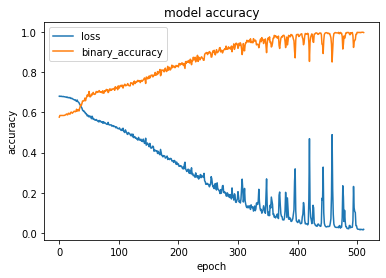

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'binary_accuracy'], loc='upper left')
plt.show()